In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os, shutil
from keras import models
from keras import layers
from sklearn.metrics import confusion_matrix, f1_score
np.random.seed(123)
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

Using TensorFlow backend.


In [142]:
import os
import pandas as pd

In [140]:
animal_folder_list = [folder for folder in os.listdir(path='./Data')]
animal_folder_list
animal_folder_list.remove('.DS_Store')
animal_folder_list

['virginia_opossum',
 'raccoon',
 'coyote',
 'red_fox',
 'bald_eagle',
 'seals',
 'canada_lynx',
 'elk',
 'black_bear',
 'raven',
 'nutria',
 'gray_fox',
 'bobcat',
 'ringtail',
 'gray_wolf',
 'mountain_beaver',
 'sea_lions',
 'deer',
 'cougar',
 'columbian_black-tailed_deer']

In [190]:
def getListOfFiles(dirName):
    # create a list of file and sub directories 
    # names in the given directory 
    listOfFile = os.listdir(dirName)
    allFiles = list()
    # Iterate over all the entries
    for entry in listOfFile:
        # Create full path
        fullPath = os.path.join(dirName, entry)
        print(fullPath)
        # If entry is a directory then get the list of files in this directory 
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
                
    return allFiles
  
  
dirName = './Data/'
# Get the list of all files in directory tree at given path
listOfFiles = getListOfFiles(dirName)
listOfFiles.remove('./Data/virginia_opossum/.DS_Store')
listOfFiles

./Data/virginia_opossum
./Data/virginia_opossum/c99846c4c28a6ba5ab.jpg
./Data/virginia_opossum/830d9a49632371e52b.jpg
./Data/virginia_opossum/856064da9252661f3b.jpg
./Data/virginia_opossum/6fa22e11d3b957d7a1.jpg
./Data/virginia_opossum/a6ca09de7cd558a9c4.jpeg
./Data/virginia_opossum/b988ffaf6b7ec39c00.jpg
./Data/virginia_opossum/4afd26af1b564abc88.jpg
./Data/virginia_opossum/5492fe4320d7d575c3.jpg
./Data/virginia_opossum/006877cf532b75583d.jpg
./Data/virginia_opossum/387dfdcc079c7134b9.jpg
./Data/virginia_opossum/aa70e2aaca56ba2523.jpg
./Data/virginia_opossum/cc2b2eb7bd2509d4ec.jpg
./Data/virginia_opossum/6327ea09a6346754b4.jpg
./Data/virginia_opossum/44a5783b43d9611813.jpg
./Data/virginia_opossum/91229c98b8b3c66138.jpg
./Data/virginia_opossum/e004533a6babf08fee.jpg
./Data/virginia_opossum/e7366033417fe00104.jpg
./Data/virginia_opossum/73715e6025292de2c8.jpg
./Data/virginia_opossum/b3f1eda4e895b54fdf.jpg
./Data/virginia_opossum/b5eb559ac4b19291fe.jpg
./Data/virginia_opossum/e3510619995

./Data/coyote/77e5cedebed9d00eef.jpg
./Data/coyote/c6833505e0b17d0283.jpg
./Data/coyote/7ad8a55b8449ab8cd0.jpg
./Data/coyote/d2fea5fedf41b3e24a.jpg
./Data/coyote/2755c1c476ae987669.jpg
./Data/coyote/82898698f5d5444f98.jpg
./Data/coyote/2e5a5478e95ffd73e6.jpg
./Data/coyote/f135f34a055bb829f0.jpg
./Data/coyote/ce1c84713f9e84b2ee.jpg
./Data/coyote/8fd5fb749c12bc355c.jpg
./Data/coyote/4ab1ca275ac6f232c2.png
./Data/coyote/cb992b662377501e7b.jpg
./Data/coyote/28b1ba088014fcf1b2.jpg
./Data/coyote/e47fc703106ecdce9c.jpg
./Data/coyote/9a6868e52816fbc59c.jpg
./Data/coyote/02eca450745fc03ced.jpg
./Data/coyote/f37bcdc1c99fb7e967.jpg
./Data/coyote/3b1d50d8b5f1cf3b60.jpg
./Data/coyote/97ab0115eaa0b9c0d2.jpg
./Data/coyote/b2070db0c10a37631a.jpg
./Data/coyote/711f4b00835159bd62.png
./Data/coyote/57b475673e0221c545.jpg
./Data/coyote/0fd701ffeab08d305d.jpg
./Data/coyote/68271b4eab94c4727b.jpg
./Data/coyote/35ffa6a55d9d802403.jpg
./Data/coyote/d3d76da855472521cb.jpg
./Data/coyote/8a8cd98c09ab9433cd.jpg
.

./Data/canada_lynx/08fc5e09b8ee8c7e29.jpg
./Data/canada_lynx/7912a9e53b46d0c813.jpg
./Data/canada_lynx/4f3dd3a6b45b77872b.jpeg
./Data/canada_lynx/2a4043a72cd8dc62eb.jpg
./Data/canada_lynx/6b0271fd4fcf134f83.jpg
./Data/canada_lynx/9fd78c088ba981c208.jpg
./Data/canada_lynx/97bbb94f0d10a6b808.jpg
./Data/canada_lynx/e47fdbd429018e1aee.gif
./Data/canada_lynx/80d67dd25c0cb63d43.jpg
./Data/canada_lynx/f1bd56d09e4115bf4c.jpg
./Data/canada_lynx/8328563b121a9c0dff.jpg
./Data/canada_lynx/f834cee1ba1ea11a7f.jpg
./Data/canada_lynx/700a4cc109f7f34b2d.jpg
./Data/canada_lynx/e1c7b3ad1527a512b8.jpg
./Data/canada_lynx/a09666073b2c4b8cb1.jpg
./Data/canada_lynx/6bb24b73f2e0a2bbd7.jpg
./Data/canada_lynx/ed390b71449ea12ba5.jpg
./Data/canada_lynx/5041b7e13f6ed4cb93.jpg
./Data/canada_lynx/05995afd5d3adcc432.jpg
./Data/canada_lynx/2b18f8a93731181b41.jpg
./Data/canada_lynx/ddf77e110414165e44.jpg
./Data/canada_lynx/3fc0b767ee60b40474.jpg
./Data/canada_lynx/ebae4fe074582672ff.jpg
./Data/canada_lynx/dbc4ad185b26d9

./Data/raven/060cce110b87af5691.jpg
./Data/raven/05f8e1028c0912887f.jpg
./Data/raven/a8bca33c573bf32455.jpg
./Data/raven/ece55a3f8c3ecea5ba.jpg
./Data/raven/fdac78f74e76d13bb0.jpg
./Data/raven/018472859e5005d99d.jpg
./Data/raven/b08b8ba3b1aee9d093.jpg
./Data/raven/dd300d624d057c9b6b.jpg
./Data/raven/c456b5b8747b61f85e.jpg
./Data/raven/b7781fccd61c99fbe5.jpg
./Data/raven/e1287544223883ed3f.jpg
./Data/raven/f0283ba06a9eccc364.jpg
./Data/raven/9f3718e4f2e8f81e5a.jpg
./Data/raven/6f4b4fbd6baccd3128.jpg
./Data/raven/f9eb5a105534bcdf60.jpg
./Data/raven/3eeca97ae3e2169856.png
./Data/raven/299bea1e8ae212e90e.jpg
./Data/raven/3c5d9167f311a5fcfd.jpg
./Data/raven/1fca756d45aad2897e.jpg
./Data/raven/ce47173e207a250b73.gif
./Data/raven/649f1c4e914c458eb9.jpg
./Data/raven/613f11539b88721f0f.jpg
./Data/raven/3ce5c6116babdd774a.jpg
./Data/raven/4a0d2453d694853980.jpg
./Data/raven/61dfbe25a25dc34cf5.jpg
./Data/raven/1e41893b62a80b67a9.jpg
./Data/raven/9cd8218d58ea226530.jpg
./Data/raven/2e3c76142bc7efe

./Data/ringtail/589105a8dd3fea967f.jpg
./Data/ringtail/28a2e5c3782616ad2c.jpg
./Data/ringtail/671d05be94737d0ee1.jpg
./Data/ringtail/d6af2a29518977647e.png
./Data/ringtail/ee240423f2f339f2de.jpg
./Data/ringtail/a6510a1c16c4445aae.jpg
./Data/ringtail/bd679d21447940170f.jpg
./Data/ringtail/422518a66bbd61be50.jpg
./Data/ringtail/c27f6bb792e1e206c5.jpg
./Data/ringtail/ba98e9227ada891ddd.gif
./Data/ringtail/ba9e4cb513d5b01f3b.gif
./Data/ringtail/ca86bc27151f9ce4ae.jpg
./Data/ringtail/487e6aef612b43bda4.png
./Data/ringtail/f9719faa85b395a9e7.jpg
./Data/ringtail/7ed6b7b8ef3ba37e38.jpg
./Data/ringtail/16130822167ff0241e.jpg
./Data/ringtail/398ff721b740135c3a.jpg
./Data/ringtail/28bc69332d1a9343c7.jpg
./Data/ringtail/e5eb52a4dde435a744.jpg
./Data/ringtail/eb50d63c3954b6229d.jpg
./Data/ringtail/52bbb5ef370bc88a02.jpg
./Data/ringtail/1fb347851f5d23c732.jpg
./Data/ringtail/3e83e62d6e92e04574.jpg
./Data/ringtail/faef1198a77da0a826.jpg
./Data/ringtail/1a0169c7273498f12a.jpg
./Data/ringtail/aa11ae3a5

./Data/sea_lions/c413f87d2f8a5466d1.jpg
./Data/sea_lions/2f6952fa580ad9fef2.jpg
./Data/sea_lions/db64ba2d7ddf57d3a9.jpg
./Data/sea_lions/91bd3c241fd4abbb26.jpg
./Data/sea_lions/dbd6c9e37013821712.jpg
./Data/sea_lions/fd83b2bf48d7bea67e.jpg
./Data/sea_lions/37e1feafc7d29fe7ba.jpg
./Data/sea_lions/55c3ae80e70e6a0209.jpg
./Data/sea_lions/3a9e4c7fa6f464f689.jpg
./Data/sea_lions/4d9731fc9971ce927a.jpg
./Data/sea_lions/580852eaf70d769d17.jpg
./Data/sea_lions/2dbfb6220e40abea85.jpg
./Data/sea_lions/f98c6e666254f905e0.jpg
./Data/sea_lions/912d3183930719ec5b.jpg
./Data/sea_lions/1f078b9a407ef11e35.jpg
./Data/sea_lions/e2021abd383acc3c99.jpg
./Data/sea_lions/4b532b3ae32ea81405.jpg
./Data/sea_lions/b0ac0dbdd3c8e64efe.jpg
./Data/sea_lions/26f33ecc2ea87f582a.jpg
./Data/sea_lions/b1750f8bf852068405.jpg
./Data/sea_lions/cd3e502646e733acd0.jpg
./Data/sea_lions/aad026eb4566c93c85.jpg
./Data/sea_lions/42a7b34608a21ed153.jpg
./Data/sea_lions/ff0bc8ced0dced571e.jpg
./Data/sea_lions/f83649d3d0648d7eb1.jpg


ValueError: list.remove(x): x not in list

In [182]:
file_list_df = pd.DataFrame(listOfFiles, columns=['fullpath'])



file_list_df['filename'] = file_list_df.fullpath.apply(lambda x: x.replace(dirName, ''))
file_list_df['class'] = file_list_df.filename.apply(lambda x: x.split('/')[0])
file_list_df['class_index'] = file_list_df.groupby('class').cumcount()
file_list_df['class_count'] = file_list_df.groupby('class').cumcount(max) 
#file_list_df['class_percent'] = file_list_df.class_index / file_list_df.groupby('class').count()

file_list_df.head()

,fullpath,filename,class,class_index,class_count
0,./Data/virginia_opossum/virginia_opossum,virginia_opossum/virginia_opossum,virginia_opossum,0,0
1,./Data/virginia_opossum/raccoon,virginia_opossum/raccoon,virginia_opossum,1,1
2,./Data/virginia_opossum/coyote,virginia_opossum/coyote,virginia_opossum,2,2
3,./Data/virginia_opossum/red_fox,virginia_opossum/red_fox,virginia_opossum,3,3
4,./Data/virginia_opossum/bald_eagle,virginia_opossum/bald_eagle,virginia_opossum,4,4


In [169]:
file_list_df.loc[file_list_df['class'] == 'virginia_opossum', 'class_count'] = 19

In [175]:
class_count_df = file_list_df.groupby('class').count()['class_count'][1:].reset_index()

In [180]:
pd.merge(file_list_df, class_count_df, on='class', how='left')

,fullpath,filename,class,class_index,class_count_x,class_count_y
0,./Data/virginia_opossum/virginia_opossum,virginia_opossum/virginia_opossum,virginia_opossum,0,19,20.0
1,./Data/virginia_opossum/raccoon,virginia_opossum/raccoon,virginia_opossum,1,19,20.0
2,./Data/virginia_opossum/coyote,virginia_opossum/coyote,virginia_opossum,2,19,20.0
3,./Data/virginia_opossum/red_fox,virginia_opossum/red_fox,virginia_opossum,3,19,20.0
4,./Data/virginia_opossum/bald_eagle,virginia_opossum/bald_eagle,virginia_opossum,4,19,20.0
5,./Data/virginia_opossum/seals,virginia_opossum/seals,virginia_opossum,5,19,20.0
6,./Data/virginia_opossum/canada_lynx,virginia_opossum/canada_lynx,virginia_opossum,6,19,20.0
7,./Data/virginia_opossum/elk,virginia_opossum/elk,virginia_opossum,7,19,20.0
8,./Data/virginia_opossum/black_bear,virginia_opossum/black_bear,virginia_opossum,8,19,20.0
9,./Data/virginia_opossum/raven,virginia_opossum/raven,virginia_opossum,9,19,20.0


In [131]:
keras.preprocessing.image.ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None)


flow_from_directory('./Data', target_size=(256, 256), color_mode='rgb', classes=None, class_mode='categorical', batch_size=32, shuffle=True, seed=None, save_to_dir=None, save_prefix='', save_format='png', follow_links=False, subset=None, interpolation='nearest')
class_indices

NameError: name 'flow_from_directory' is not defined

In [115]:
folder = ['test_'+animal for animal in animal_list]
print(folder)
    
    
    
# loc = (os.listdir(path='./Data/'+animal))
# print(len(loc)/2)
# animal_files = []
# for item in loc:
#     animal_files.append(item)
# print(len(os.listdir(path='./Data/'+animal)))
# print(len(animal_files))

['test_virginia_opossum', 'test_raccoon', 'test_.DS_Store', 'test_test', 'test_coyote', 'test_red_fox', 'test_bald_eagle', 'test_seals', 'test_canada_lynx', 'test_elk', 'test_black_bear', 'test_raven', 'test_nutria', 'test_gray_fox', 'test_bobcat', 'test_ringtail', 'test_gray_wolf', 'test_train', 'test_mountain_beaver', 'test_sea_lions', 'test_deer', 'test_cougar', 'test_columbian_black-tailed_deer']


In [2]:
# Set up data into train and test directories with folders of bobcat and not_bobcat
train_data_dir = '/Users/j.markdaniels/Downloads/final_proj_data/bobcat_cougar_data/train/'#348 bobcat, 340 not_bobcat
test_data_dir = '/Users/j.markdaniels/Downloads/final_proj_data/bobcat_cougar_data/test/'#348 bobcat, 340 not_bobcat

test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_data_dir, 
        target_size=(128, 128), batch_size=340)

train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_data_dir, 
        target_size=(128, 128), batch_size=340)

# create the data sets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)

Found 685 images belonging to 2 classes.
Found 680 images belonging to 2 classes.


/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +
/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 85 bytes but only got 0. Skipping tag 33285
  " Skipping tag %s" % (size, len(data), tag))
/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 93 bytes but only got 0. Skipping tag 33285
  " Skipping tag %s" % (size, len(data), tag))
/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 141 bytes but only got 0. Skipping tag 37386
  " Skipping tag %s" % (size, len(data), tag))
/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 149 bytes bu

In [3]:
# get all the data in the directory split/test, and reshape them
data_te = ImageDataGenerator(rescale=1./255).flow_from_directory( 
        '/Users/j.markdaniels/Downloads/final_proj_data/bobcat_cougar_data/test/', 
        target_size=(224, 224), 
        batch_size = 340, 
        seed = 123)

Found 685 images belonging to 2 classes.


In [4]:
data_tr = ImageDataGenerator(rescale=1./255).flow_from_directory( 
        '/Users/j.markdaniels/Downloads/final_proj_data/bobcat_cougar_data/train/', 
        target_size=(224, 224), 
        batch_size = 340, 
        seed = 123) 

Found 680 images belonging to 2 classes.


In [5]:
#split images and labels
images_tr, labels_tr = next(data_tr)

In [6]:
#split images and labels
images_te, labels_te = next(data_te)

In [7]:
images = np.concatenate((images_tr, images_te))

In [8]:
labels = np.concatenate((labels_tr[:,0], labels_te[:,0]))

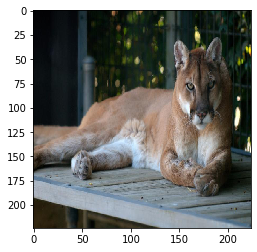

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(images[23])
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
X_model, X_test, y_model, y_test = train_test_split(images, labels, test_size=0.20, random_state=123)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_model, y_model, test_size=0.20, random_state=123)

In [23]:
cnn = models.Sequential()
cnn.add(layers.Conv2D(64, (1, 1), activation='relu', input_shape=(224, 224,  3)))
cnn.add(layers.BatchNormalization())
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn.add(layers.BatchNormalization())
# 64 bias parameters
# 64 * (3 * 3 * 3) weight parametrs
# Output is 64*224*224
cnn.add(layers.MaxPooling2D((2, 2)))
#Output is 64*112*112
cnn.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224,  3)))
cnn.add(layers.BatchNormalization())
#32 bias parameters
#32 * (3*3*64)
#Output is 32*112*112 
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Flatten())
cnn.add(layers.Dense(32, activation='relu'))
cnn.add(layers.Dense(1, activation='sigmoid'))

cnn.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['acc'])

In [24]:
cnn1 = cnn.fit(X_train,
                    y_train,
                    epochs=100,
                    batch_size=50,
                    validation_data=(X_val, y_val))

Train on 435 samples, validate on 109 samples
Epoch 1/100
435/435 [==============================] - 53s 122ms/step - loss: 1.2094 - acc: 0.6046 - val_loss: 0.6238 - val_acc: 0.6514
Epoch 2/100
435/435 [==============================] - 47s 108ms/step - loss: 0.5378 - acc: 0.7264 - val_loss: 0.6707 - val_acc: 0.6606
Epoch 3/100
435/435 [==============================] - 48s 110ms/step - loss: 0.4099 - acc: 0.8069 - val_loss: 0.5825 - val_acc: 0.7431
Epoch 4/100
435/435 [==============================] - 49s 112ms/step - loss: 0.3245 - acc: 0.8690 - val_loss: 0.7094 - val_acc: 0.6514
Epoch 5/100
435/435 [==============================] - 48s 110ms/step - loss: 0.2580 - acc: 0.9103 - val_loss: 0.6318 - val_acc: 0.7339
Epoch 6/100
435/435 [==============================] - 48s 111ms/step - loss: 0.1598 - acc: 0.9379 - val_loss: 0.6218 - val_acc: 0.7431
Epoch 7/100
435/435 [==============================] - 48s 110ms/step - loss: 0.1187 - acc: 0.9494 - val_loss: 0.7877 - val_acc: 0.7523
Ep

In [25]:
print(cnn.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 224, 224, 64)      256       
_________________________________________________________________
batch_normalization_2 (Batch (None, 224, 224, 64)      256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 110, 110, 64)      36928     
_________________________________________________________________
batch_normalization_3 (Batch (None, 110, 110, 64)      256       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 55, 55, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 53, 53, 32)        18464     
__________

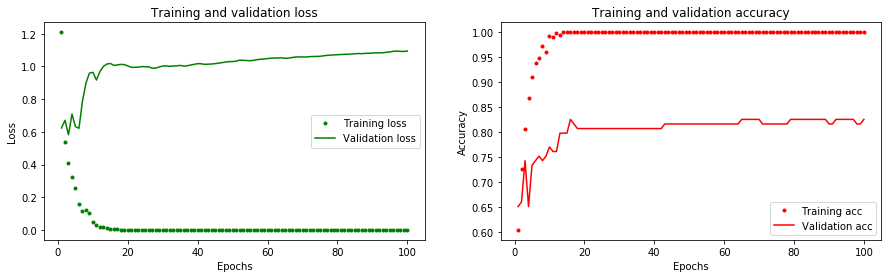

In [26]:
hist_cnn = cnn1.history
loss_values = hist_cnn['loss']
val_loss_values = hist_cnn['val_loss']
acc_values = hist_cnn['acc'] 
val_acc_values = hist_cnn['val_acc']


epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(epochs, loss_values, 'g.', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(epochs, acc_values, 'r.', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [27]:
results_train = cnn.evaluate(X_train, y_train)
results_test = cnn.evaluate(X_test, y_test)
print(results_train, results_test)

136/136 [==============================] - 6s 44ms/step
[6.323382405607008e-05, 1.0] [0.785735193420859, 0.8235294117647058]


In [29]:
cnn.save('cnn_first_draft.h5')